In [1]:
import os
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import cmocean
import seaborn as sns
import datetime

import cartopy.crs as ccrs
import cartopy.feature as cfeature
from mpl_toolkits.axes_grid1.inset_locator import InsetPosition
from shapely.geometry.polygon import LinearRing
import matplotlib.patheffects as pe

%matplotlib inline

plt.rcParams['font.size'] = '14'

In [2]:
workingdir = r'C:\Users\mijakes\checkouts\phd-public'
os.chdir(workingdir) 

In [3]:
import imp
import src.importData as imports
import src.maps as maps
import src.settings as settings
import src.calc as calc
import src.interpolation as interp

In [4]:
floatids = [8489, 8490, 8492, 8493]
ema = imports.importFloatData(floatids)

datadir = os.path.join(os.sep, 'Users', 'mijakes', 'checkouts', 'phd', 'data')
alt_cmems = imports.importNetCDF(datadir, 'CMEMS.nc', datatype ='altimetry')

bathymetry =  imports.importNetCDF(datadir, 'bathy.nc', datatype ='bathy')
bathymetry['depth'] = bathymetry.elevation*-1
new_bathy = bathymetry.coarsen(lon=10).mean().coarsen(lat=10).mean()

In [5]:
# Import VMP data 
vmp = imports.importNetCDF(datadir, 'VMP_derived_variables.nc', datatype ='vmp')

In [6]:
# Triaxus
datadir = os.path.join(os.sep, 'Users', 'mijakes', 'checkouts', 'phd', 'data', 'triaxus')
folder = 'in2018_v05CtdAvgTriaxus_VerticalCasts_nc'

lst = ['01_002', '02_002', '02_005', '03_003', '04_002', '04_003', 
       '06_002', '07_002', '08_002', '08_003', '09_002', '09_003']
triaxus_cast = {}
for i in lst:
    file = 'in2018_v05_'+ i +'AvgCast.nc'
    triaxus_cast[i] = imports.importNetCDF(datadir, file, datatype = folder)

In [7]:
my_path = os.path.join(os.sep, 'Users', 'mijakes', 'checkouts', 'phd', 'figures', 'chapter2_manuscript')

In [8]:
pal = sns.color_palette("husl", 4)
pal.as_hex()[:]

['#f77189', '#97a431', '#36ada4', '#a48cf4']

Text(0.5, 0, 'Longitude (°E)')

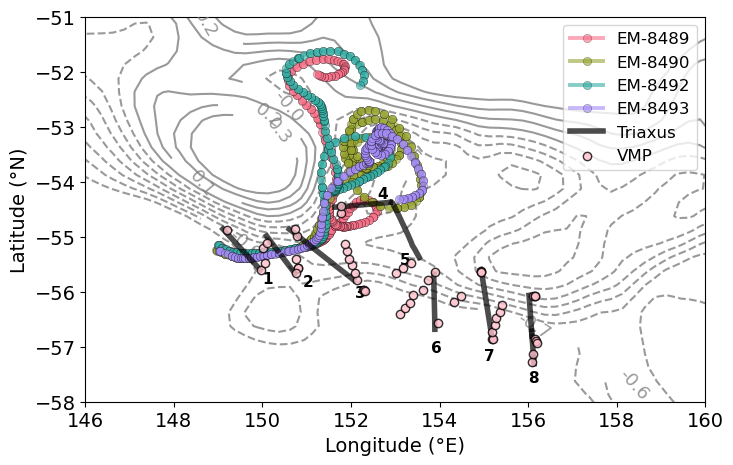

In [9]:
fig, ax = plt.subplots(figsize = (8, 5))
# Draw float trajectories
cols = pal.as_hex()[:]
legend = []

i = 0
for floatid in [8489, 8490, 8492, 8493]:
    rs = calc.findRSperiod(ema[floatid])
    ax.plot(ema[floatid].longitude[rs], ema[floatid].latitude[rs],'.-', 
            linewidth = 2.8, markersize=12, c = cols[i], markeredgecolor='k', 
            markeredgewidth= 0.25, alpha = 0.6, zorder = 5)
    legend.append(f'EM-{floatid}')
    i+=1
    
# Triaxus
lon = triaxus_cast[lst[0]].longitude
lat = triaxus_cast[lst[0]].latitude
plt.plot(lon, lat, c = 'k', alpha = 0.7, linewidth = 4, zorder = 10)
legend.append(f'Triaxus')

# VMP profiles
plt.scatter(vmp.longitude, vmp.latitude, zorder = 11, edgecolors = 'k', facecolors = 'pink', alpha = 0.8)
legend.append(f'VMP')

ax.legend(legend, loc = 'upper right', prop={'size': 12})

for i in lst[1:]:
    lon = triaxus_cast[i].longitude
    lat = triaxus_cast[i].latitude
    plt.plot(lon, lat, c = 'k', alpha = 0.7, linewidth = 4, zorder = 10)

start = ema[floatid].time.values[0]
end = ema[floatid].time[rs].values[-1] 
start_time = str(start.astype('M8[D]'))
end_time = str(end.astype('M8[D]'))
mean_sea_level = alt_cmems.adt.sel(time = slice(start_time, end_time)).mean(dim = 'time')

# SSH contours
levels = np.arange(-0.7,0.4,0.1)
CS = mean_sea_level.plot.contour(colors = 'grey', linewidths = 1.5, alpha = 0.8, levels = levels)
plt.clabel(CS, inline=True, fontsize=13, fmt = '%1.1f')

# new_bathy.depth.plot(cmap = cmocean.cm.deep, vmin = 500, vmax = 6000, alpha = 0.3, cbar_kwargs = dict(label = 'depth (m)'))

ax.set_ylim(-58, -51)
ax.set_xlim(146, 160)
# ax.legend(legend, loc = 'lower left', prop={'size': 12})

#numbering
ax.text(150, -55.85, '1', fontsize = 11, fontweight = 'bold')
ax.text(150.9, -55.9, '2', fontsize = 11, fontweight = 'bold')
ax.text(152.1, -56.1, '3', fontsize = 11, fontweight = 'bold')
ax.text(152.6, -54.3, '4', fontsize = 11, fontweight = 'bold')
ax.text(153.1, -55.5, '5', fontsize = 11, fontweight = 'bold')
ax.text(153.8, -57.1, '6', fontsize = 11, fontweight = 'bold')
ax.text(155, -57.25, '7', fontsize = 11, fontweight = 'bold')
ax.text(156, -57.65, '8', fontsize = 11, fontweight = 'bold')


plt.ylabel(u'Latitude (\N{DEGREE SIGN}N)')
plt.xlabel(u'Longitude (\N{DEGREE SIGN}E)')

In [10]:
datadir = os.path.join(os.sep, 'Users', 'mijakes', 'checkouts', 'phd', 'data')
alt_cmems_extend = imports.importNetCDF(datadir, 'cmems_20yr_adt.nc', datatype ='altimetry')

In [11]:
t1 = '1998-12-01'
t2 = '2018-12-01'

adt_20_yr = alt_cmems_extend.adt.sel(time = slice(t1, t2))

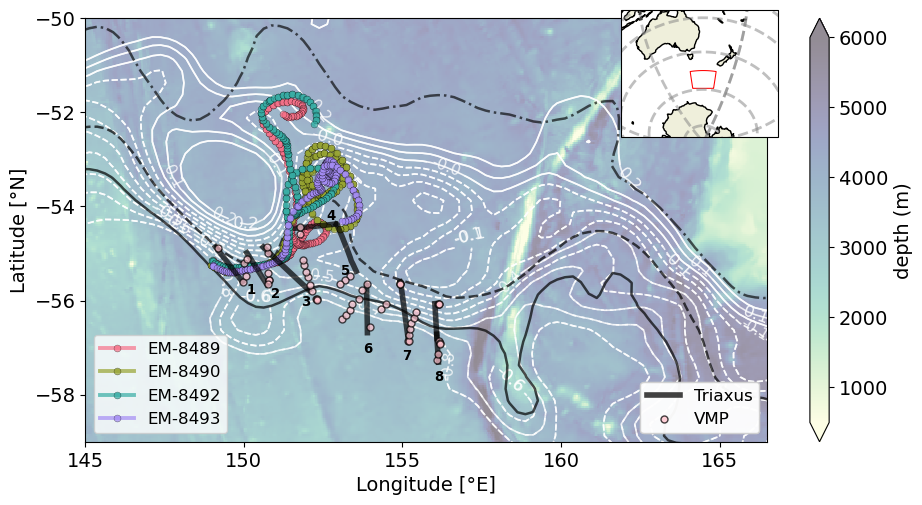

In [13]:
imp.reload(maps)

floatids = [8489, 8490, 8492, 8493]

fig, ax = maps.floatDomain(floatids, bathymetry, alt_cmems, extent = [145,166.5,-59,-50], fig_size = (11,5.5), 
                                                                            pal = sns.color_palette("husl", 4), 
                                                                            save_fig = False)
# SSH contours
levels = np.arange(-0.8,0.3,0.1)
CS = mean_sea_level.plot.contour(ax = ax, colors = 'white', linewidths = 1.2, alpha = 0.8, levels = levels)
plt.clabel(CS, inline=True, fontsize=11, fmt = '%1.1f')
    
# PF
adt_20_yr.mean(dim = 'time').plot.contour(ax = ax, levels = np.arange(-0.65, -0.64, 0.05), linestyles = '-',
                                         colors = 'k', alpha = 0.7, linewidths = 1.8, zorder = 5)

# SAF-S
adt_20_yr.mean(dim = 'time').plot.contour(ax = ax, levels = np.arange(-0.4, -0.39, 0.05), linestyles = '--',
                                         colors = 'k', alpha = 0.7, linewidths = 1.8, zorder = 5) 

# SAF-N
adt_20_yr.mean(dim = 'time').plot.contour(ax = ax, levels = np.arange(0.21, 0.22, 0.05), linestyles = '-.',
                                         colors = 'k', alpha = 0.65, linewidths = 1.8, zorder = 5) 


ax.set_ylim(-59, -50)
ax.set_xlim(145, 166.5)

#numbering
ax.text(150.1, -55.85, '1', fontsize = 9.5, fontweight = 'bold', zorder = 9)
ax.text(150.85, -55.95, '2', fontsize = 9.5, fontweight = 'bold', zorder = 9)
ax.text(151.8, -56.1, '3', fontsize = 9.5, fontweight = 'bold', zorder = 9)
ax.text(152.6, -54.28, '4', fontsize = 9.5, fontweight = 'bold', zorder = 9)
ax.text(153.05, -55.45, '5', fontsize = 9.5, fontweight = 'bold', zorder = 9)
ax.text(153.75, -57.1, '6', fontsize = 9.5, fontweight = 'bold', zorder = 9)
ax.text(155, -57.25, '7', fontsize = 9.5, fontweight = 'bold', zorder = 9)
ax.text(156, -57.7, '8', fontsize = 9.5, fontweight = 'bold', zorder = 9)


legend2 = []
#Triaxus
for i in lst:
    lon = triaxus_cast[i].longitude
    lat = triaxus_cast[i].latitude
    line = ax.plot(lon, lat, c = 'k', alpha = 0.7, linewidth = 4, zorder = 10)
    
legend2.append(f'Triaxus')

# VMP profiles
scatter = ax.scatter(vmp.longitude, vmp.latitude, zorder = 11, edgecolors = 'k', facecolors = 'pink', s= 25, alpha = 0.7)
legend2.append(f'VMP')

legend2 = ax.legend([line[0], scatter], legend2, loc = 'lower right', prop={'size': 12})
ax.add_artist(legend2)

ax.set_xticks(np.arange(145, 170, 5))
ax.set_yticks(np.arange(-58, -49, 2))

ax.set_ylabel(u'Latitude [\N{DEGREE SIGN}N]')
ax.set_xlabel(u'Longitude [\N{DEGREE SIGN}E]')

# settings.save_figure(fig, my_path, 'domain_map_with_vmp.png', dpi = 600, pad = 0.2)